<a href="https://colab.research.google.com/github/sroy890/Linear-regression/blob/main/Automobile_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

In [98]:
auto = pd.read_csv('Automob_clean.csv')
auto.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [99]:
auto = auto.iloc[:, 2:]
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               201 non-null    object 
 1   fuel-type          201 non-null    object 
 2   aspiration         201 non-null    object 
 3   num-of-doors       201 non-null    object 
 4   body-style         201 non-null    object 
 5   drive-wheels       201 non-null    object 
 6   engine-location    201 non-null    object 
 7   wheel-base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb-weight        201 non-null    int64  
 12  engine-type        201 non-null    object 
 13  num-of-cylinders   201 non-null    object 
 14  engine-size        201 non-null    int64  
 15  fuel-system        201 non-null    object 
 16  bore               201 non

In [100]:
#Dividing into two dataframes

numerical_df = auto.select_dtypes(include=['int','float'])
categorical_df = auto.select_dtypes(include=['object'])


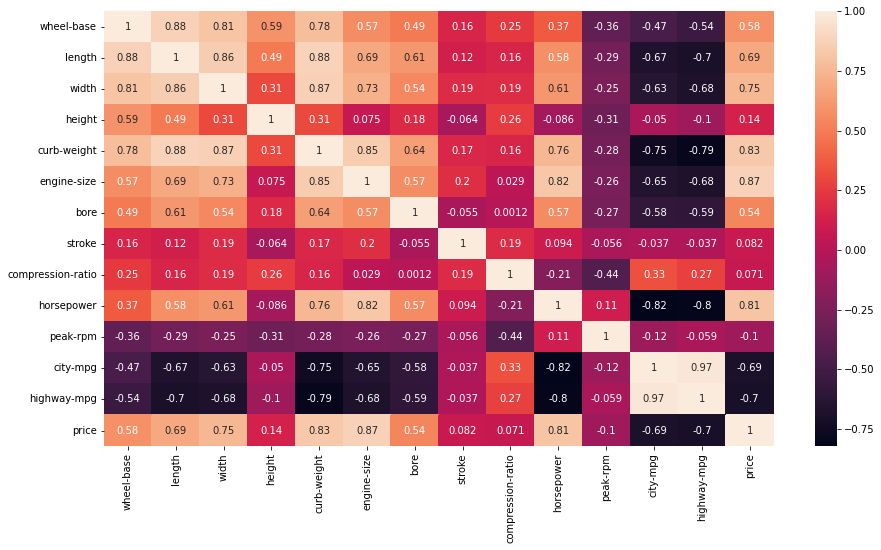

In [101]:
plt.subplots(figsize = (15,8))
sns.heatmap(numerical_df.corr(), annot=True)

In [102]:
#Getting absolute values of corr coeff and sorting values

num_corr_coff= numerical_df.corr()['price'].abs().sort_values()
num_corr_coff

compression-ratio    0.071107
stroke               0.082209
peak-rpm             0.102310
height               0.135486
bore                 0.543154
wheel-base           0.584642
city-mpg             0.686571
length               0.690628
highway-mpg          0.704692
width                0.751265
horsepower           0.810500
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64

In [103]:
## Let's only keep columns with a correlation coefficient larger than 0.5

more_corr = num_corr_coff[num_corr_coff > 0.5]
more_corr

bore           0.543154
wheel-base     0.584642
city-mpg       0.686571
length         0.690628
highway-mpg    0.704692
width          0.751265
horsepower     0.810500
curb-weight    0.834415
engine-size    0.872335
price          1.000000
Name: price, dtype: float64

In [104]:
# Drop columns with less than 0.5 correlation with Price
auto = auto.drop(num_corr_coff[num_corr_coff < 0.5].index, axis=1)

In [105]:
for col in categorical_df:
  categorical_df[col] = categorical_df[col].astype('category')


In [106]:
# For analysis and prediction pupose we shoudl drop the category column which contains more than 10 unique values

print('UNIQUE VALUES: \n') 
for i in categorical_df.columns:
  print(i,':', categorical_df[i].unique())

UNIQUE VALUES: 

make : ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', ..., 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Length: 22
Categories (22, object): ['alfa-romero', 'audi', 'bmw', 'chevrolet', ..., 'subaru', 'toyota', 'volkswagen',
                          'volvo']
fuel-type : ['gas', 'diesel']
Categories (2, object): ['diesel', 'gas']
aspiration : ['std', 'turbo']
Categories (2, object): ['std', 'turbo']
num-of-doors : ['two', 'four']
Categories (2, object): ['four', 'two']
body-style : ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
Categories (5, object): ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']
drive-wheels : ['rwd', 'fwd', '4wd']
Categories (3, object): ['4wd', 'fwd', 'rwd']
engine-location : ['front', 'rear']
Categories (2, object): ['front', 'rear']
engine-type : ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf']
Categories (6, object): ['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']
num-of-cylinders : ['four', 'six', 'five', 'three', 'tw

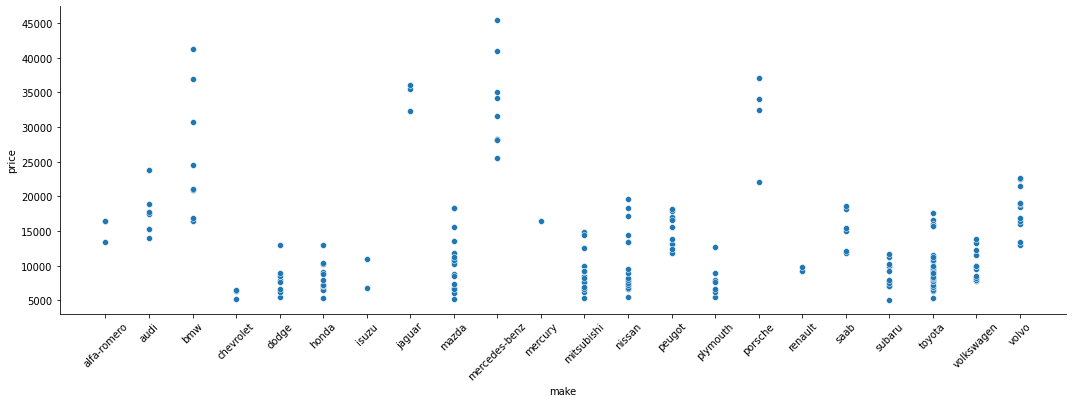

In [107]:
sns.relplot(categorical_df.make, auto.price, height=5, aspect=3).set_xticklabels(rotation = 45)

#but as we see it would not be appropriate to drop make columns as price range is highly dependable on differents brand names

In [108]:
cat_dummies = pd.get_dummies(categorical_df, drop_first=True)
cat_dummies.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [109]:
auto = auto.drop(categorical_df.columns,axis= 1)

In [110]:
auto = pd.concat([cat_dummies, auto],axis=1)

In [111]:
auto.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,13495.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,16500.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,94.5,171.2,65.5,2823,152,2.68,154.0,19,26,16500.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,99.8,176.6,66.2,2337,109,3.19,102.0,24,30,13950.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,99.4,176.6,66.4,2824,136,3.19,115.0,18,22,17450.0


In [112]:
#separating the input & output

x= auto.iloc[:,:-1]
print(x.shape)
y = auto.iloc[:,-1:]
print(y.shape)

(201, 58)
(201, 1)


In [113]:
#spliting into train & test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= 0.4, random_state=100)

In [114]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 58)
(120, 1)
(81, 58)
(81, 1)


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [116]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [117]:
train_predict = model.predict(x_train)

metrics.r2_score(train_predict,y_train)

0.9732819172681055

In [118]:
test_predict = model.predict(x_test)
metrics.r2_score(test_predict, y_test)

0.8889144040033042

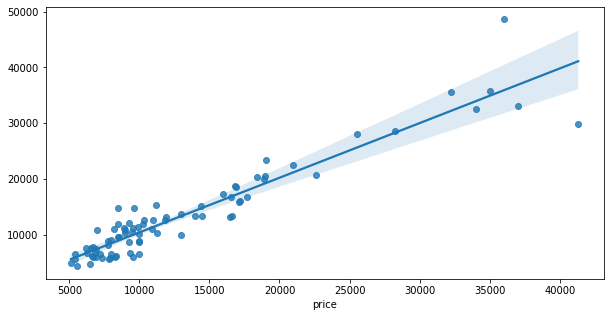

In [119]:
plt.subplots(figsize = (10,5))
sns.regplot(y_test, test_predict)

In [120]:
#Recursive feature elimination with cross validation

from sklearn.feature_selection import RFECV

In [121]:
ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error', cv=4, verbose=0, n_jobs=4)

# Fit recursive feature eliminator 
rfecv.fit(x_train, y_train)

# Number of best features
print(); print(rfecv)
print(); print(rfecv.n_features_)



RFECV(cv=4, estimator=LinearRegression(), n_jobs=4,
      scoring='neg_mean_squared_error')

39


In [122]:
print('Best features :', x_train.columns[rfecv.support_])

Best features : Index(['make_bmw', 'make_honda', 'make_isuzu', 'make_jaguar',
       'make_mercedes-benz', 'make_mercury', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas',
       'aspiration_turbo', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_rear', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_rotor', 'num-of-cylinders_five',
       'num-of-cylinders_four', 'num-of-cylinders_six',
       'num-of-cylinders_three', 'num-of-cylinders_two', 'fuel-system_2bbl',
       'fuel-system_idi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi', 'width', 'bore'],
      dtype='object')


In [123]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)   # as rfecv will work only dataset with same number of features so we transform x_test


In [124]:
ols.fit(x_test_rfecv, y_test)


LinearRegression()

In [125]:
test_predict = ols.predict(x_test_rfecv)
metrics.r2_score(test_predict, y_test)

0.929658624388332

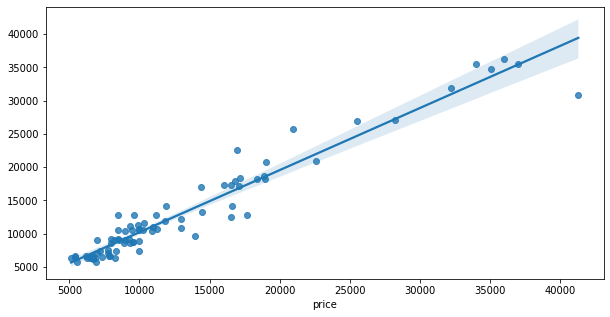

In [126]:
plt.subplots(figsize = (10,5))
sns.regplot(y_test, test_predict)